## Agent Based Modeling (ABM)
- Tool for studying complex adaptive systems
- Example: termites model
    - The model consists of agents, an environment, and interactions between agents and environment
    - The system is adaptive and changes over tiem
    - ABM generates emergent patterns
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/termites_netlogo.png" width="250">

-----------

This material is based on the previous version of CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Agent based modeling (ABM) modeling phases
- Setup: instantion (creation) of world
    - Describe the world you will be modeling and the rules that describe it
- Runtime loop: the agents put into motion.  Each iteration: 
    - Each agent changes it's state (say, gets more apples, or a tree catches on fire)
    - Any needed changes to world also occur, like a resource is consumed or added to    
- Exit

### Visualize ABM like this
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/agent_based_modeling.png" width="250">

### ABM Runtime Loop
- Each loop iteration is one tick, step
- You can think of each loop iteration as one unit of time, like an hour or a minute
- For apple trading, each runtime loop iteration gives each agent enough time to trade apples, if someone else is nearby
- For forest fires, each runtime loop iteration is a unit of time, during which the model computes if any new trees have caught on fire

### Our ABM enviroment will refer to each iteration as a step

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/agent_based_modeling.png" width="250">

### There are three main abstractions
1. Agents with rules
2. There is an environment or model within which the agents live
    - This would be a grid for apple trading, where traders walk around
    - This would be a forest grid for the forest fire model
3. Time: time is dictated (controlled) by a the runtime loop.
    - Each loop iteration is one tick or one step of abstracted time
    - You could think of a step as lasting one second, one hour, one day, ..., whatever makes sense for your simulation

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/agent_based_modeling.png" width="250">

### Summary: Modeling with ABM
- A model is a representation of the interaction of real-world objects in a complex system
- The goal is to gain an understanding of how the model's results relate to real-world phenomena
- Random factors built into the model and variables changed by the user (you) cause different results to be generated each time a model is run
    - When you run a model many times, each time you get a different outcome
    - You learn the statistics of the model, like 20% of the time we get outcome A, and the rest of the time we get outcome B

We are constructing a model, not a replica

### Model Classification Scheme
1. Idea models, most abstract: example model only a predator and a prey

2. Minimal systems models: model a specific predator (say wolf) and specific prey (say caribou)

3. Detailed systems models: model every wolf and every caribou within Yellowstone park

Every step in more detail, allows you to learn more about a particular question, but loses you generality.

### Learning about modeling, step-by-step
1. Learn how to use ABM
    - Learning about models and modeling
    - Conduct experiments by changing values and variables (like how many apples agents start with, or how combustible a tree is)
    - Collect and analyze results

2. Learn how to modify ABM
    - Deconstruct models into agents, behaviors, environment, and interactions
    - Deepen coding skills as you modify the agents, behaviors, environment, and interactions
    
3. Learn how to create ABM
    - How create abstract representation of real-world problem that is suitable for ABM
    - Implement and evaluate new model

### For agent based modeling (ABM), we will be using Mesa

https://github.com/projectmesa/mesa

### First, you have to make sure that Mesa is installed
- Run the below cell

In [3]:
! pip install mesa


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


### Next, we import our modeling tools
- Run the below cell

In [4]:
import mesa

# Data visualization tools.
import seaborn as sns

# Data manipulation and analysis.
import pandas as pd

### Now, we can begin creating our apple trading agent based model (ABM)

### First, we create the Agent object, called AppleTraderAgent
- Notice how this object inherits from the class `mesa.Agent`
- This inheritance allows Mesa to use our object
    - For instance, the function call `super.__init__(unique_id, model)` instantiates (creates) all the stuff related to the parent class `mesa.Agent`

    - This inheritance is a key point

### See the course video for today for details on this object

In [13]:
# Create ABM

# Create your list here (regarding the last HW task)


# 1. Define the Agent Abstraction
class AppleTraderAgent(mesa.Agent):
    """An agent that trades apples and begins with 1 apple."""

    def __init__(self, unique_id, model):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Create the agent's number of apples and set initial value
        self.NumberApples = 1

    def step(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print("Hi, I am an apple trading agent, you can call me " + str(self.unique_id))

### Next, we create our AppleTradingModel.  This defines two more of our key abstractions:
1. This defines the environment where the agents (apple traders) exist
2. This also defines how to take a step (tick) forward in time

### Similar to the agent, the AppleTradingModel inherits from `mesa.Model`
- This inhertiance is key and allows Mesa to use our model

### See the course video for today for details on this object
- The `__init__` function describes how to create the environment and agents
- The `step` function describes how to step forward in the runtime loop

In [14]:
# 2. Define the Model (or environment) Abstraction for the Agents to live in
class AppleTradingModel(mesa.Model):
    """A model with some number of apple trading agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = AppleTraderAgent(i, self)
            # Add the agent to the scheduler
            self.schedule.add(a)

    # 3. Define each step or time tick: 
    #    Each step or tick will call the AppleTraderAgent.step() function once
    def step(self):
        """Advance the model by one step."""

        # The model's step will go here for now this will call the step method of each agent and print the agent's unique_id
        self.schedule.step()

### And now to run the model, the syntax is easy!
1. We first create a new AppleTradingModel object called `starter_model`
2. Then, we take one single step in the Runtime loop
    - This allows each Agent to run AppleTraderAgent.step() one single time
    
### Key Point: Running AppleTradingModel.step() once, in turn runs AppleTraderAgent.step() once for each agent

### Task: Run the below cell a few times.  Note how the agents are executed in a random order each time.

In [15]:
# Create AppleTradingModel object called starter_model
starter_model = AppleTradingModel(10)

# Take one single step in the Runtime loop
starter_model.step()

Hi, I am an apple trading agent, you can call me 1
Hi, I am an apple trading agent, you can call me 8
Hi, I am an apple trading agent, you can call me 9
Hi, I am an apple trading agent, you can call me 3
Hi, I am an apple trading agent, you can call me 0
Hi, I am an apple trading agent, you can call me 4
Hi, I am an apple trading agent, you can call me 2
Hi, I am an apple trading agent, you can call me 6
Hi, I am an apple trading agent, you can call me 5
Hi, I am an apple trading agent, you can call me 7


### We can run one step again and note how the order of the agents changes again

The code `self.schedule.step()` in the model activates (runs) each Agent in a random order for each Runtime loop step.

This is because we earlier chose `self.schedule = mesa.time.RandomActivation(self)`

In [12]:
# Note how the order changes each time
starter_model.step()

Hi, I am an apple trading agent, you can call me 3.
Hi, I am an apple trading agent, you can call me 6.
Hi, I am an apple trading agent, you can call me 4.
Hi, I am an apple trading agent, you can call me 1.
Hi, I am an apple trading agent, you can call me 2.
Hi, I am an apple trading agent, you can call me 9.
Hi, I am an apple trading agent, you can call me 5.
Hi, I am an apple trading agent, you can call me 0.
Hi, I am an apple trading agent, you can call me 8.
Hi, I am an apple trading agent, you can call me 7.


### Task: modify the code to have every agent print out it's number of apples when taking a step.  You want your ABM to produce output like this

        Hi, I am an apple trading agent, you can call me 6 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 0 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 2 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 5 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 3 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 4 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 8 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 7 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 1 and I have 1 apple.
        Hi, I am an apple trading agent, you can call me 9 and I have 1 apple.
        
### Change your model above, re-run and generate output like this.        

### Make sure to use `self.NumberApples` to get the number of apples -- that is, don't just print 1


Hint: You'll want to add this to your printed output: `str(self.NumberApples)`, along with some new text.

Hint: You can add text together with the `+` command, like 

`".... you can call me 9 and I have " + str(self.NumberApples) + " apple."`

### Task: Track the order that the agents are activated

1. Create a list variable above where indicated, 
- Name this list `agent_numbers`

2. Then, inside AppleTraderAgent.step(), append the value `self.unique_id` to this list

### Task. Interpret your data
1. Compute the median and mean of your list `agent_numbers`
    - Print this information to the screen
    - Add some discussion of these numbers  in the 

global variable to store all the agent ids, then do some kind of pandas statistics
  - mean and median should be 4.5 (use pandas)
    
  Extra credit ... or only worth 5 or 10 points...
  - count the number of times that 0 occurs in that list
  - divide by lenght of list
  - do the same for 1 or 2
  - these are random, but each number comes up on average, the same number of times.

<AxesSubplot: >

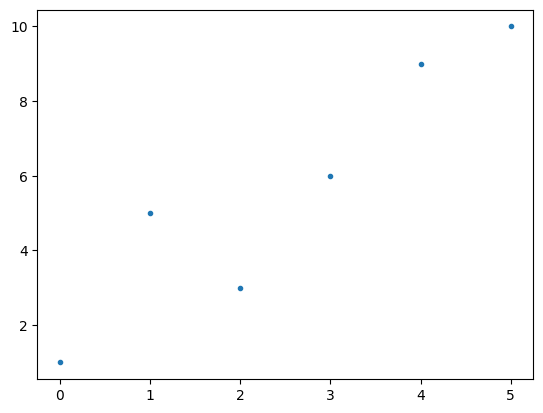

In [37]:
lst = [1,5,3,6,9,10]
df = pd.DataFrame(lst, columns=['numbers'])
df['numbers'].plot(kind='line', style=['.'])

### Homework Discussion Goes Here



### Homework Submission Instructions

### The homework submission instructions are different this week. 

### Download your notebook as an ".ipynb" file, and upload the ipynb file as your assignment to Canvas.

### Do not upload a .py file